# Analisis de calidad de suministro electrico
## Analisis y Visualizacion de datos

Se propone la elaboración de un informe o presentacion, en formato estatico (pdf, slides) o dinamico (Pagina Web, Markdown) que responda a las cuestiones solicitadas en cada seccion de este notebook.

El trabajo debe ser capaz de ser comprendido por un publico general, no especializado en ciencia de datos, por lo cual debe estar redactado de forma consisa y comprensible.

### 1 - Analisis General

- Cuantas entradas posee el dataset y que representa cada una?
- Si queremos analizar calidad de servicio cual seria a su parece la variable de salida?

### 2 - Analisis Estadistico

- Cuales son las variables numericas? 
- Cuanto valen los principales estadisticos?
- Existen valores que no sean validos? Cuales? Que se puede hacer en esos casos?
- Poseen outliers? Que tecnicas se pueden utilizar para mitigar su impacto.
- Como es la distribucion de los valores? Son normales?
- Calcule los principales estadisticos despues del preprocesamiento.
- Adicione los graficos o tablas que considere oportuno para graficar los puntos anteriores.


- Cuales son las variables categoricas? Cual es la cardinalidad de las mismas?
- En base a la respuesta anterior vale la manera mantenerlas a todas?
- Cuales son los 3 valores mas comunes de cada categoria?
- Escoja 2 variables y grafique sus niveles contra la cantidad de apariciones.


- Cuando sea posible calcule la correlacion entre cada variable y la salida, y entre variables.
- Cual es la variable de mayor correlacion con la salida.
- Que variables estan altamente correlacionadas entre si? que se puede hacer con ellas?
- Escoja una variable categorica y calcule las distribuciones condicionales para cada nivel de la misma.
- Como podemos saber si las distribuciones condicionales son diferentes entre ellas?

### 3 - Preguntas

- Calcule el consumo total anual de cada consumidor.
- Existe relacion entre consumo y frecuencia de corte de servicio (FIC)?
- Como varia el servicio entre zonas urbanas y rurales?
- Como varia el consumo entre zonas urbanas y rurales?
- Ordene los conjuntos de suministro (CONJ) de por consumo?


- Compare los consumos energeticos medios entre cada estacion del año.
- Existen diferencias estadisticamente significativas?


- Cuales son 10 actividades economicas mas comunes de la region?
- Dentro de ellas:
    - Cuales tienen mayor y menor frecuencia de corte
    - Cuales son las de mayor y menor consumo?


### 4 - Preguntas Opcionales

##### Relacion entre variables categoricas
- Realize un test Chi Caudrado para verificar la relacion entre Conjuntos de Suministro (CONJ) y zonificacion (ARE_LOC).
- Explique el resultado.

##### Agregacion de variables, cat > num
- Calcule el porcentage de consumidores en areas urbanas en cada conjunto y municipio.
- Calcule la correlacion entre este valor y la frecuencia de interrupcion (FIC)

##### Agregacion de variables, num > cat
- Discretise el valor de salida FIC en 5 niveles.
- Realize un boxplot con los consumos por cada nivel

## Lectura de datos
Para la lectura y manipulacion de datos georeferenciados utilizaremos la libreria GeoPandas.

In [44]:
import warnings
warnings.filterwarnings('ignore')

In [45]:
from IPython.display import Image

import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon, MultiPoint, MultiLineString

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import datetime

In [46]:
data_path = './data/SULGIPE_46_2018-12-31_M10_20190611-1750.gdb'

In [47]:
# Carguemos la tabla de consumidores de baja tension denominada UCBT
ucbt = gpd.read_file(data_path, driver='FileGDB', layer='UCBT')

In [50]:
col_sel = ['PAC', 'CONJ', 'MUN', 'BRR', 'CLAS_SUB', 'CNAE', 
 'FAS_CON', 'GRU_TEN', 'TEN_FORN', 'GRU_TAR', 'DAT_CON', 'CAR_INST',
 'ENE_01', 'ENE_02', 'ENE_03', 'ENE_04', 'ENE_05', 'ENE_06', 'ENE_07',
 'ENE_08', 'ENE_09', 'ENE_10', 'ENE_11', 'ENE_12', 'ARE_LOC', 'SIT_ATIV',
 'FIC']

data = ucbt[col_sel]

In [51]:
# Previsualizacion de datos
data.head()

,PAC,CONJ,MUN,BRR,CLAS_SUB,CNAE,FAS_CON,GRU_TEN,TEN_FORN,GRU_TAR,...,ENE_06,ENE_07,ENE_08,ENE_09,ENE_10,ENE_11,ENE_12,ARE_LOC,SIT_ATIV,FIC
0,UC111674,12743,2927002,RIO REAL,RE1,0,AN,BT,22,B1,...,119.0,126.0,109.0,152.0,139.0,188.0,208.0,UB,AT,8.0
1,UC138742,15602,2800670,BOQUIM,CO1,0,BN,BT,22,B3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UB,DS,0.0
2,UC72370,15602,2802106,BAIRRO ALAGOAS,RE1,0,ABN,BT,22,B1,...,306.0,197.0,248.0,220.0,267.0,216.0,230.0,UB,AT,3.0
3,UC73881,15602,2802106,BAIRRO ALAGOAS,RE2,0,AN,BT,22,B1,...,89.0,74.0,88.0,95.0,91.0,97.0,91.0,UB,AT,3.0
4,UC73886,15602,2802106,BAIRRO ALAGOAS,CO1,0,ABCN,BT,22,B3,...,174.0,152.0,148.0,97.0,141.0,133.0,126.0,UB,AT,3.0


## Analisis General


Para esta practico utilizaremos solo las siguientes columnas

Verifiquemos si los tipos de datos se corresponden a los valores especificados

In [28]:
data.dtypes

PAC          object
CONJ          int64
MUN          object
BRR          object
CLAS_SUB     object
CNAE         object
FAS_CON      object
GRU_TEN      object
TEN_FORN     object
GRU_TAR      object
DAT_CON      object
CAR_INST    float64
ENE_01      float64
ENE_02      float64
ENE_03      float64
ENE_04      float64
ENE_05      float64
ENE_06      float64
ENE_07      float64
ENE_08      float64
ENE_09      float64
ENE_10      float64
ENE_11      float64
ENE_12      float64
ARE_LOC      object
DIC         float64
FIC         float64
dtype: object

Podemos ver que existen dos variables que no se corresponden al tipo de dato especificado:

    - CONJ es un identificador categorico pero fue interpretado como numero
    - DAT_CON es una fecha pero se reconoce como texto

In [29]:
# Convertimos los identificadores de los conjuntos a strings
data['CONJ'] = data.CONJ.astype(str)
data['DAT_CON'] = pd.to_datetime(data.DAT_CON, dayfirst=True, format='%d/%m/%Y')

In [30]:
# Clasificar columnas en categoricas y numericas
cat_ft = data.columns[data.dtypes == 'object']
num_ft = data.columns[data.dtypes != 'object']

## 3 - Distribucion estadistica

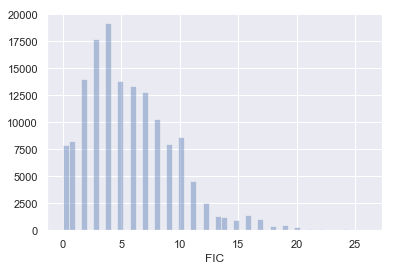

In [55]:
# Distribucion de la Frecuencia de interrupciones
sns.distplot(data.FIC, kde=False)

### Graficos de interaccion entre variables

Ademas de la distribucion tambien podemos graficar la relacion entre las variables y la salida, o entre ellas.

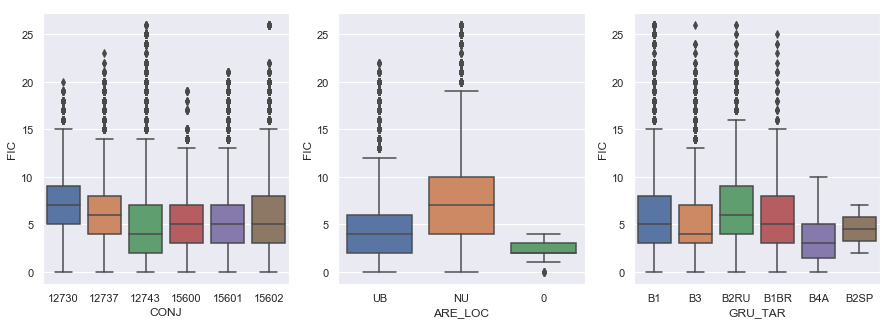

In [118]:
# Para relacionar variables categoricas con una variable numerica podemos usar un BoxPlot
# Boxplot de FIC en base a variables categoricas.

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(x= 'CONJ', y='FIC', data=data)

plt.subplot(1,3,2)
sns.boxplot(x= 'ARE_LOC', y='FIC', data=data)

plt.subplot(1,3,3)
sns.boxplot(x= 'GRU_TAR', y='FIC', data=data)

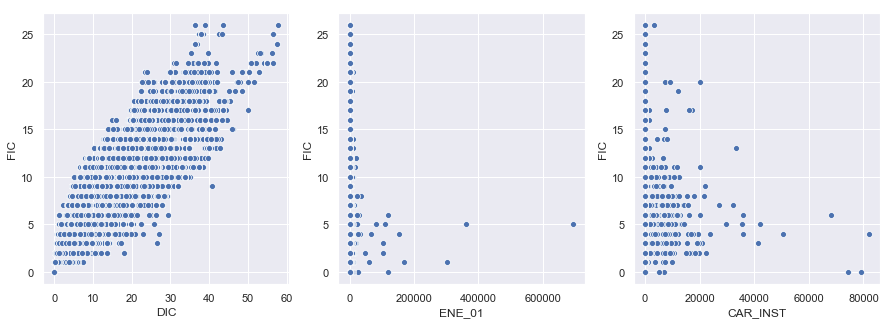

In [129]:
# Para relacionar variables numericas podemos usar un ScatterPlot
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.scatterplot(x= 'DIC', y='FIC', data=data)

plt.subplot(1,3,2)
sns.scatterplot(x= 'ENE_01', y='FIC', data=data)

plt.subplot(1,3,3)
sns.scatterplot(x= 'CAR_INST', y='FIC', data=data)

Una manera rapida de verificar la relacion entre variables es calcular la correlacion.

Que puede ser graficada en un heatmap.

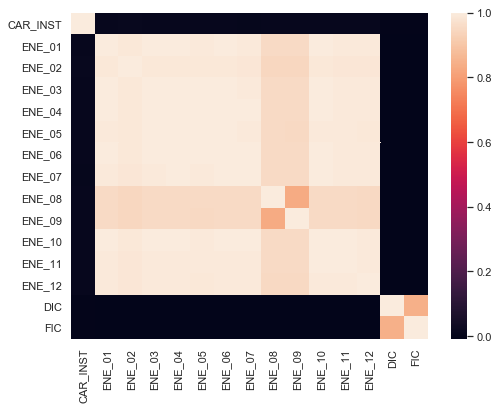

In [136]:
plt.figure(figsize=(8,6))
sns.heatmap(data[num_ft].corr())

Es posible chequear la correspondencia entre variables categoricas haciendo un crosstab para verificar que una categoria no sea una simple subdivision de otra.